In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [9]:
df = pd.read_csv("/Users/yasminekroknes-gomez/DH-500/detections.csv")
display(df.head())

,Image,Detected_Object,Confidence
0,122.jpeg,person,1.00
1,122.jpeg,person,1.00
2,122.jpeg,person,1.00
3,122.jpeg,person,0.99
4,122.jpeg,person,0.98


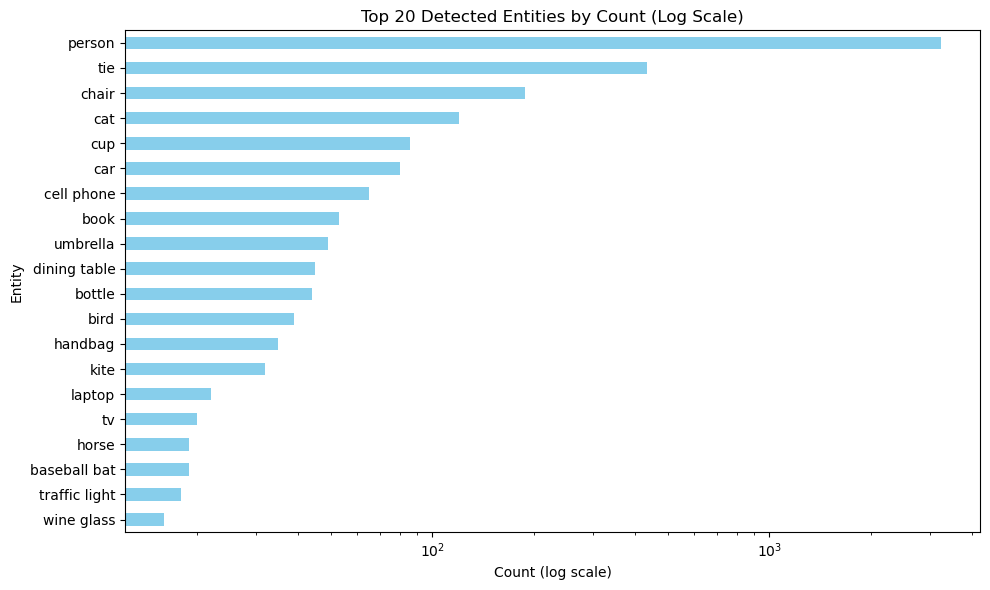

In [36]:
df['Confidence'] = df['Confidence'].astype(float)

# Total count of each detected entity
entity_counts = df['Detected_Object'].value_counts()
# print("Entity Counts:")
# print(entity_counts)

# Plot top 20
top_20_entities = entity_counts[:20]

plt.figure(figsize=(10,6))
ordered_counts = top_20_entities.sort_values()
ax = ordered_counts.plot(kind='barh', color='skyblue')
ax.set_xscale('log')  # Comment this away for non-log-scaling
plt.title("Top 20 Detected Entities by Count (Log Scale)")
plt.xlabel("Count (log scale)")
plt.ylabel("Entity")
plt.tight_layout()
plt.show()

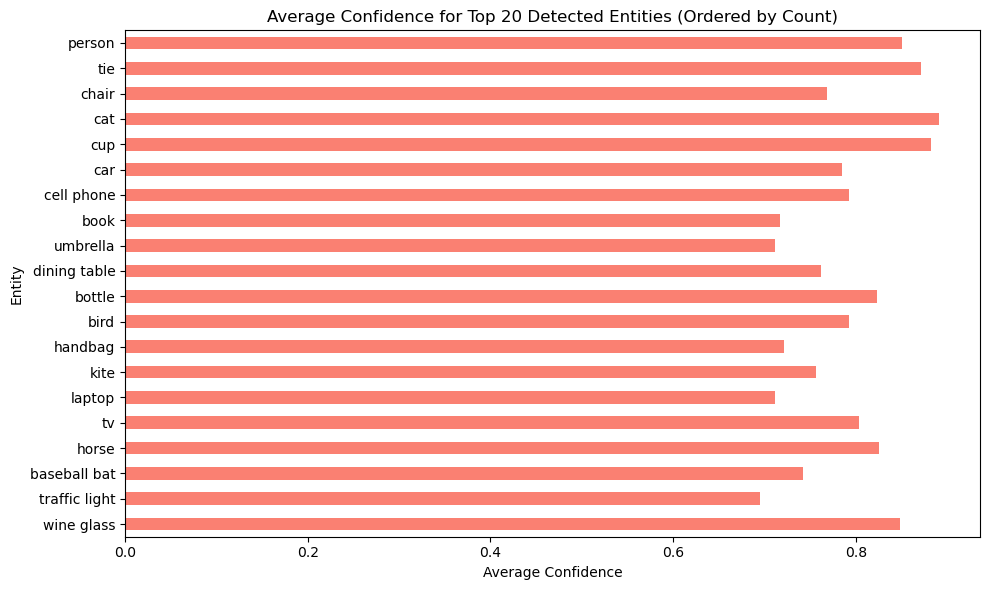

In [37]:
# Average confidence for each entity 
avg_confidence_entity = df.groupby('Detected_Object')['Confidence'].mean()

# Filter the average confidence for the top 20 entities (by count)
ordered_entities = ordered_counts.index  # This is the same ordering as the count plot
top_20_avg_confidence_ordered = avg_confidence_entity.loc[ordered_entities]

# Plot the average confidence for the top 20 entities using the same order as the count plot
plt.figure(figsize=(10,6))
top_20_avg_confidence_ordered.plot(kind='barh', color='salmon')
plt.title("Average Confidence for Top 20 Detected Entities (Ordered by Count)")
plt.xlabel("Average Confidence")
plt.ylabel("Entity")
plt.tight_layout()
plt.show()

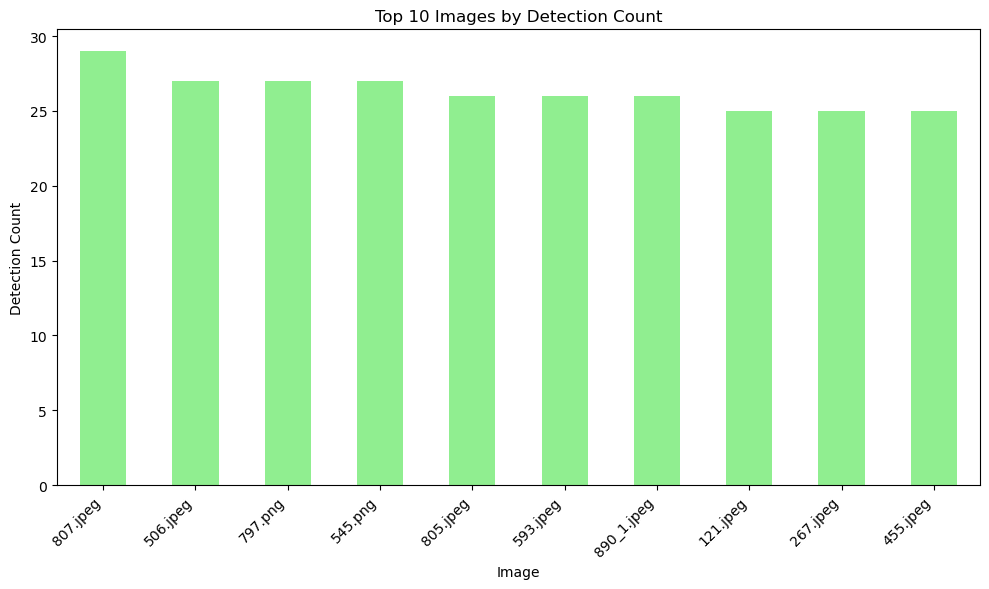

In [38]:
# 3. Detections per image.
detections_per_image = df['Image'].value_counts()
# print("Detections per Image:")
# print(detections_per_image)

plt.figure(figsize=(10,6))
detections_per_image.head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Images by Detection Count")
plt.xlabel("Image")
plt.ylabel("Detection Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

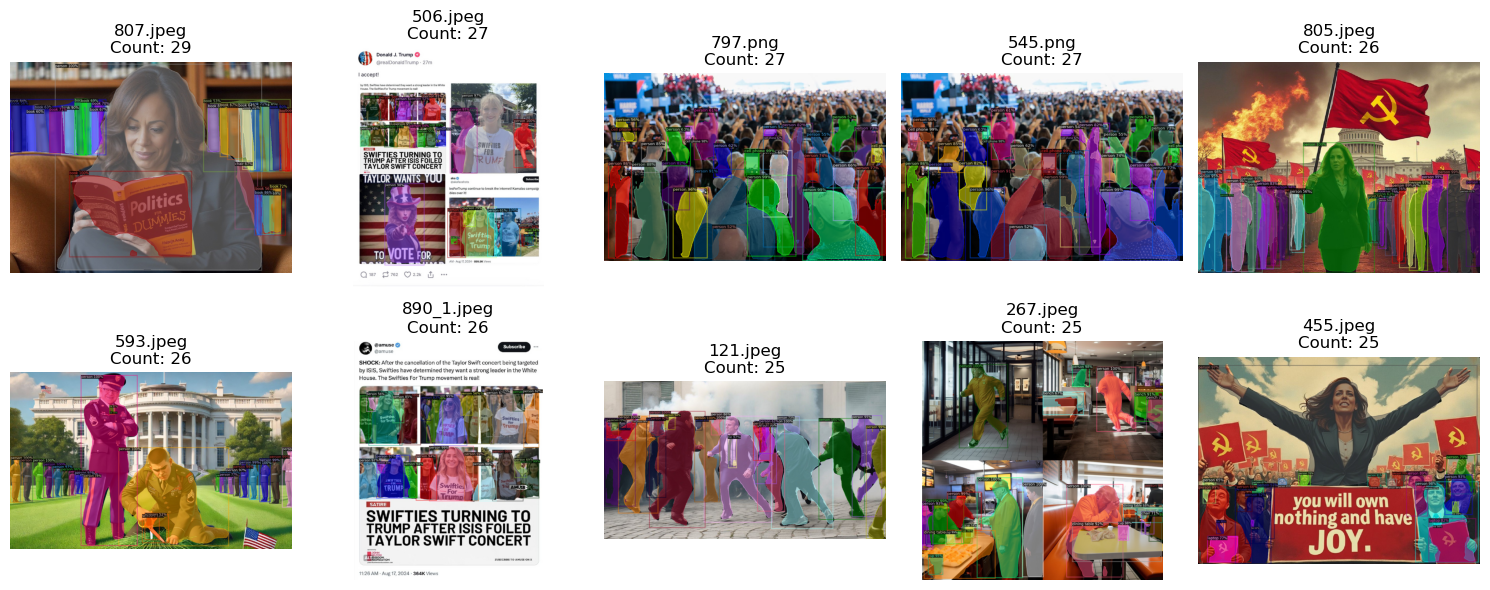

In [41]:
import cv2
import os

detections_per_image = df['Image'].value_counts()

# Extract the top 10 images by detection count.
top_10_images = detections_per_image.head(10)

# Folder containing the visualized images.
image_folder = "/Users/yasminekroknes-gomez/DH-500/data/images_detectron2"  # Adjust path if necessary.

# Create a 2x5 subplot grid.
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

# Loop through the top 10 images.
for i, image_name in enumerate(top_10_images.index):
    # Construct the full image path.
    image_path = os.path.join(image_folder, image_name)
    # Read the image with OpenCV.
    img = cv2.imread(image_path)
    if img is not None:
        # Convert from BGR (OpenCV default) to RGB for display.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        # In case the image is not found, create a placeholder.
        img = None
        print(f"Image not found: {image_path}")
    # Display the image.
    axs[i].imshow(img)
    axs[i].axis("off")
    # Add a title with the image filename and detection count.
    count = top_10_images.loc[image_name]
    axs[i].set_title(f"{image_name}\nCount: {count}")

# Hide any unused subplots (if any).
for j in range(i+1, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

Overall Confidence Statistics:
count    4900.000000
mean        0.835765
std         0.160437
min         0.500000
25%         0.700000
50%         0.890000
75%         0.990000
max         1.000000
Name: Confidence, dtype: float64


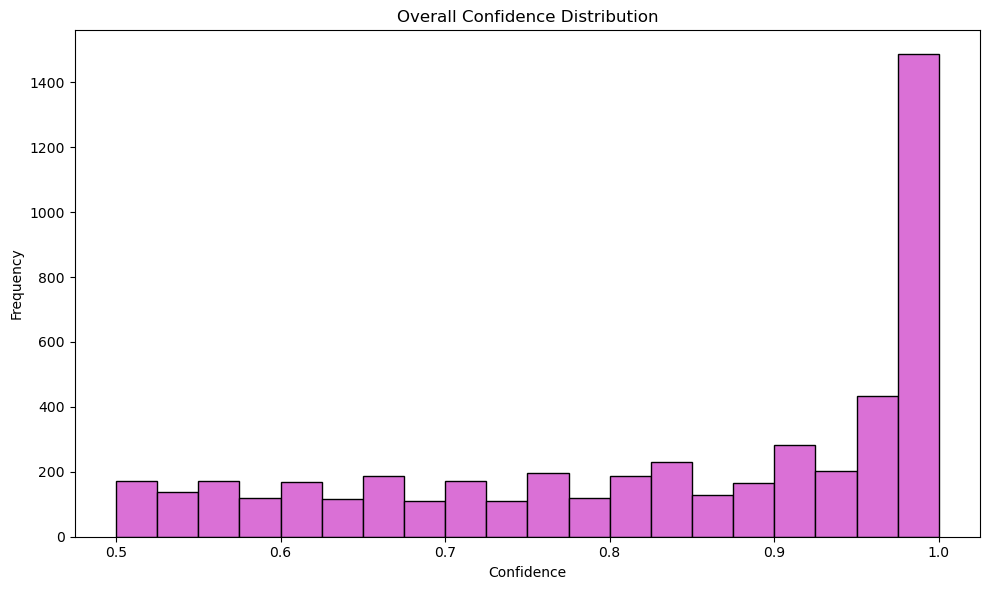

In [42]:
# 4. Overall confidence statistics.
confidence_stats = df['Confidence'].describe()
print("Overall Confidence Statistics:")
print(confidence_stats)

plt.figure(figsize=(10,6))
plt.hist(df['Confidence'], bins=20, edgecolor='black', color='orchid')
plt.title("Overall Confidence Distribution")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()